# matplotlib 绘制数据动画
> matplotlib制作数据动画方法汇总。

- toc: true
- author: Lei Yu
- categories: [matplotlib]

In [1]:
#collapse-hide
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline

# 改变颜色

In [64]:
numPoints = 10
numFrames = 20
colorData = np.random.randint(0,255,size=(numFrames, numPoints))

points = np.random.uniform(0,1,size=(numPoints, 2))

In [65]:
def update(i, scat):
    scat.set_array(colorData[i])

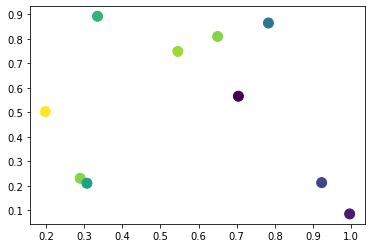

In [66]:
#hide
fig, ax = plt.subplots()
scat = ax.scatter(points[:,0], points[:,1], s=100, c=colorData[0])
ani = animation.FuncAnimation(fig, update, frames=numFrames,
                              fargs=(scat,))

In [61]:
HTML(ani.to_jshtml())

# 改变坐标

In [69]:
numPoints = 10
numFrames = 20
pos = np.random.uniform(low=-5,high=5,size=[1,numPoints,2])
pos = np.repeat(pos, repeats=numFrames,axis=0)
delta_pos = np.c_[np.linspace(0,5,numFrames),-np.linspace(0,5,numFrames)][:,None,:]
delta_pos = np.repeat(delta_pos,repeats=numPoints, axis=1)
pos = pos+delta_pos

In [70]:
def update(i, scat):
    scat.set_offsets(pos[i])

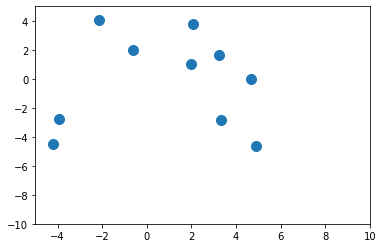

In [71]:
#hide
fig, ax = plt.subplots()
ax.set_xlim(-5,10)
ax.set_ylim(-10,5)
scat = ax.scatter(points[:,0], points[:,1], s=100)
ani = animation.FuncAnimation(fig, update, frames=numFrames,
                              fargs=(scat,))

In [72]:
HTML(ani.to_jshtml())

In [73]:
HTML(ani.to_html5_video())

In [75]:
ani.save('test.gif', writer='imagemagick')

In [ ]:
ani.save('test.mp4')

# 气球

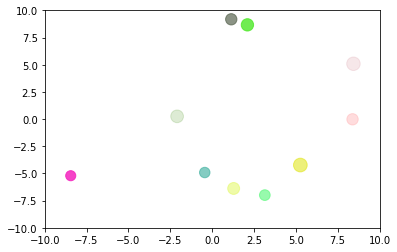

In [78]:
# Define properties of the "bouncing balls"
n = 10
pos = (20 * np.random.sample(n*2) - 10).reshape(n, 2)
vel = (0.3 * np.random.normal(size=n*2)).reshape(n, 2)
# vel = np.c_[np.ones((n,1)),-np.ones((n,1))]

sizes = 100 * np.random.sample(n) + 100

# Colors where each row is (Red, Green, Blue, Alpha).  Each can go
# from 0 to 1.  Alpha is the transparency.
colors = np.random.sample([n, 4])

fig, ax = plt.subplots()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

def update(i,circles):
    global pos, vel
    pos = pos+vel
    bounce = abs(pos) > 10      # Find balls that are outside walls
    vel[bounce] = -vel[bounce]  # Bounce if outside the walls
    circles.set_offsets(pos)    # Change the positions
    return circles,

# Draw all the circles and return an object ``circles`` that allows
# manipulation of the plotted circles.
circles = ax.scatter(pos[:,0], pos[:,1], marker='o', s=sizes, c=colors)

ani = animation.FuncAnimation(fig, update, frames=20, fargs=(circles,))

In [79]:
HTML(ani.to_jshtml())